In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df =  pd.read_csv('/media/programmerrez/Field_Testing/Courses/Client_Projects/Sir_Malik/Price-Prediction-Model/Datasets/realtor-data.zip.csv')
df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [3]:
df.drop(['brokered_by','street','prev_sold_date','zip_code'],axis=1,inplace=True)
df.columns


Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'city', 'state',
       'house_size'],
      dtype='object')

In [4]:
numeric_cols = df.select_dtypes(include='number').columns.to_list()
numeric_data = df[numeric_cols]

In [5]:
def fill_mode(df):
    df1 = df.copy()
    numeric_cols = df1.select_dtypes(include='number').columns.to_list()
    for col in numeric_cols:
        mode_val = df1[col].mode()[0]
        df1[col] = df1[col].fillna(mode_val)
    return df1


In [6]:
mode_pipeline = Pipeline(steps=[('mode_imputer', FunctionTransformer(fill_mode, validate=False))])

In [7]:
result = mode_pipeline.fit_transform(df)
result.isna().sum()

status           0
price            0
bed              0
bath             0
acre_lot         0
city          1407
state            8
house_size       0
dtype: int64

<Axes: xlabel='status', ylabel='price'>

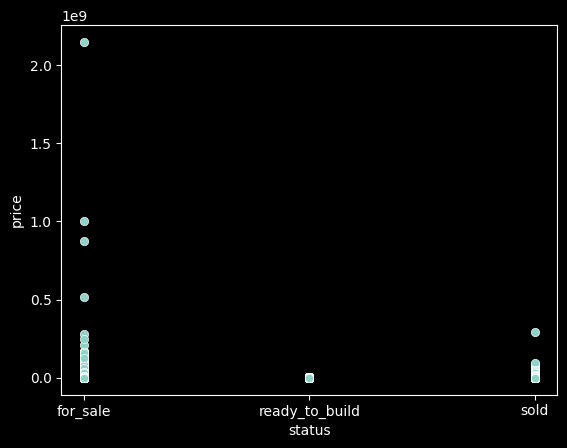

In [8]:
sn.scatterplot(result,x='status',y='price')

<Axes: xlabel='status', ylabel='price'>

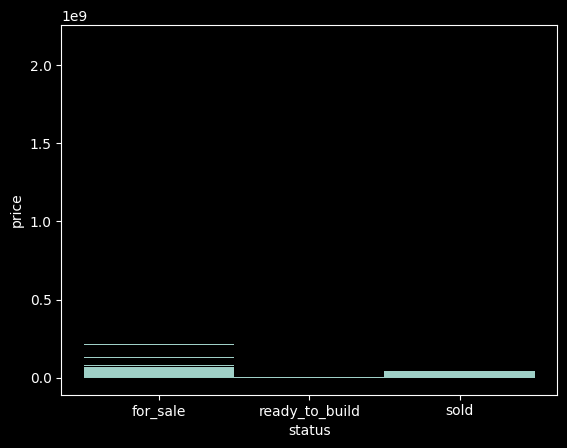

In [9]:
sn.histplot(result,x='status',y='price')

In [10]:
result.drop(['status'],axis=1,inplace=True)

In [11]:
df1 = result.copy()

In [12]:
df1.city.unique()

array(['Adjuntas', 'Juana Diaz', 'Ponce', ..., 'Tbd King Ave Pasco',
       'Washtucna', 'Kahlotus'], shape=(20099,), dtype=object)

In [13]:
df1.state.unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia',
       'Wyoming', 'Maine', 'Georgia', 'Pennsylvania', 'West Virginia',
       'Delaware', 'Louisiana', 'Ohio', 'California', 'Colorado',
       'Maryland', 'Missouri', 'District of Columbia', 'Wisconsin',
       'North Carolina', 'Kentucky', 'Michigan', 'Mississippi', 'Florida',
       'Alabama', 'New Brunswick', nan, 'Texas', 'Arkansas', 'Idaho',
       'Indiana', 'Illinois', 'New Mexico', 'Iowa', 'Minnesota',
       'South Dakota', 'Nebraska', 'North Dakota', 'Montana', 'Oklahoma',
       'Kansas', 'Oregon', 'Utah', 'Nevada', 'Washington', 'Arizona',
       'Hawaii', 'Guam', 'Alaska'], dtype=object)

In [14]:
df1.shape

(2226382, 7)

In [15]:
df1.columns

Index(['price', 'bed', 'bath', 'acre_lot', 'city', 'state', 'house_size'], dtype='object')

In [16]:
df1["sqft_lot"] = df["acre_lot"] * 43560


In [17]:
df1.sqft_lot.describe()

count    1.900793e+06
mean     6.631151e+05
std      3.322860e+07
min      0.000000e+00
25%      6.534000e+03
50%      1.132560e+04
75%      4.268880e+04
max      4.356000e+09
Name: sqft_lot, dtype: float64

In [ ]:
df1.isna().sum()

price              0
bed                0
bath               0
acre_lot           0
city            1407
state              8
house_size         0
sqft_lot      325589
dtype: int64

In [19]:
df2 = mode_pipeline.fit_transform(df1)

In [20]:
df2.sqft_lot.isna().sum()

np.int64(0)

In [21]:
df2.sqft_lot.describe()

count    2.226382e+06
mean     5.672232e+05
std      3.070379e+07
min      0.000000e+00
25%      7.405200e+03
50%      9.583200e+03
75%      2.962080e+04
max      4.356000e+09
Name: sqft_lot, dtype: float64

In [22]:
df2.dropna(subset=['city','state'], inplace=True)
df2.isna().sum()


price         0
bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
sqft_lot      0
dtype: int64

In [23]:
df2.shape

(2224967, 8)

In [24]:
df2.to_csv('/media/programmerrez/Field_Testing/Courses/Client_Projects/Sir_Malik/Price-Prediction-Model/Cleaned_Data/df_2.csv')